In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

In [2]:
actualXML = pd.read_csv("./observedXML.csv")
actualJSON =  pd.read_csv("observedValues.csv", names=['Date', 'Amounts', 'Location'])

actualXML = actualXML.rename(columns={'date':'Date',
                          'rain':'Amount',
                          'location':'Location'})
actualXML['Date']= pd.to_datetime(actualXML['Date'])


In [3]:
actualJSON['Date']= pd.to_datetime(actualJSON['Date'])

In [4]:
actualXML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 3 columns):
Date        340 non-null datetime64[ns]
Amount      340 non-null float64
Location    340 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.1+ KB


In [5]:
start_date = pd.to_datetime('2020-01-07')
end_date = pd.to_datetime('2020-03-31')

mask = (actualXML['Date'] >= start_date) & (actualXML['Date'] <= end_date)

actualXML = actualXML.loc[mask]


In [6]:
start_date ='2020-01-07'
end_date = '2020-03-31'

mask = (actualJSON['Date'] >= start_date) & (actualJSON['Date'] <= end_date)

actualJSON = actualJSON.loc[mask]

In [7]:
merged = pd.merge(actualXML, actualJSON, on=['Date', 'Location'])

In [8]:
merged["NewAmount"]= (merged["Amount"] + merged["Amounts"]) / 2

In [9]:
df = pd.read_csv("forecastYR.csv")

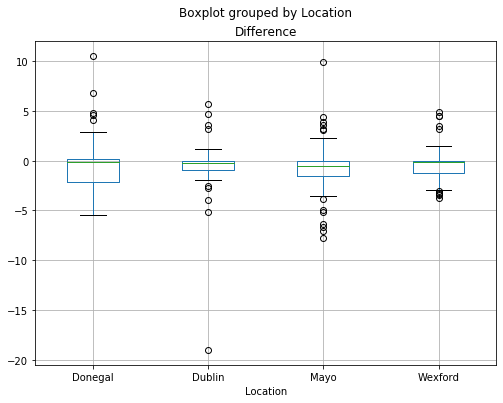

In [10]:
OneDayAhead = df[['Provider','Location', 'One_Day_Ahead', 'DateOne']].copy()
OneDayAhead['Date'] = pd.to_datetime(OneDayAhead['DateOne'])
result = pd.merge(OneDayAhead, merged, on=['Date', 'Location'])
result["Difference"] = result['One_Day_Ahead'] - result['NewAmount']
boxplotOne = result.boxplot(by = 'Location', column = ['Difference'], figsize=(8, 6) )

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmsOne = sqrt(mean_squared_error(result["NewAmount"], result["One_Day_Ahead"]))
rmsOne

2.6644271774114623

In [12]:
sumXML = result["Amount"].sum()

In [13]:
sumJSON = result["Amounts"].sum()

In [14]:
sumXML

1129.5

In [15]:
sumJSON

1108.3536

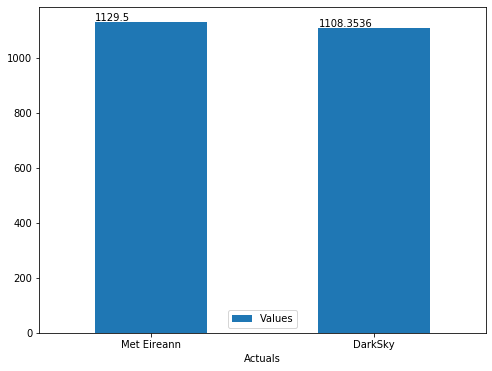

In [16]:
df1 = pd.DataFrame({'Actuals':['Met Eireann', 'DarkSky'], 'Values':[sumXML, sumJSON]})
ax = df1.plot.bar(x= 'Actuals', y= 'Values', rot=0, figsize=(8, 6))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


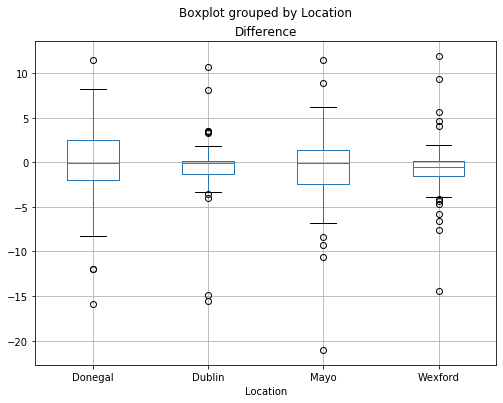

In [17]:
ThreeDayAhead = df[['Provider','Location', 'Three_Days_Ahead', 'DateThree']].copy()
ThreeDayAhead['Date'] = pd.to_datetime(ThreeDayAhead['DateThree'])
resultThree = pd.merge(ThreeDayAhead, merged, on=['Date', 'Location'])
resultThree["Difference"] = resultThree['Three_Days_Ahead'] - resultThree['NewAmount']
boxplotThree = resultThree.boxplot(by = 'Location', column = ['Difference'], figsize=(8, 6))

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmsThree = sqrt(mean_squared_error(resultThree["NewAmount"], resultThree["Three_Days_Ahead"]))
rmsThree

4.377190864094721

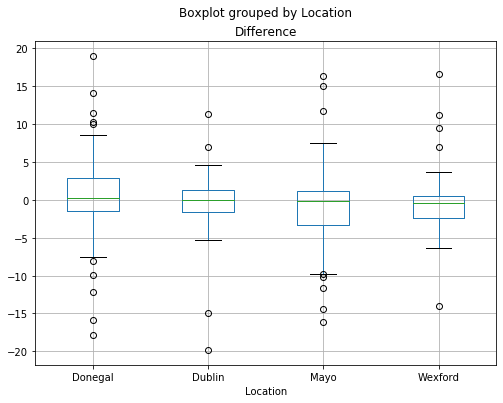

In [19]:
FiveDayAhead = df[['Provider','Location', 'Five_Days_Ahead', 'DateFive']].copy()
FiveDayAhead['Date'] = pd.to_datetime(FiveDayAhead['DateFive'])
resultFive = pd.merge(FiveDayAhead, merged, on=['Date', 'Location'])
resultFive["Difference"] = resultFive['Five_Days_Ahead'] - resultFive['NewAmount']
boxplotFive = resultFive.boxplot(by = 'Location', column = ['Difference'], figsize=(8, 6))

In [20]:
rmsFive = sqrt(mean_squared_error(resultFive["NewAmount"], resultFive["Five_Days_Ahead"]))
rmsFive

5.542198881043249

In [21]:
merged.head()

,Date,Amount,Location,Amounts,NewAmount
0,2020-01-07,2.4,Donegal,10.7328,6.5664
1,2020-01-08,2.5,Donegal,0.7488,1.6244
2,2020-01-09,0.8,Donegal,4.0032,2.4016
3,2020-01-10,2.6,Donegal,5.9664,4.2832
4,2020-01-11,17.5,Donegal,21.0144,19.2572


In [22]:
DublinXML = merged.loc[merged['Location'] == 'Dublin', 'Amount'].sum()
DonegalXML = merged.loc[merged['Location'] == 'Donegal', 'Amount'].sum()
MayoXML = merged.loc[merged['Location'] == 'Mayo', 'Amount'].sum()
WexfordXML = merged.loc[merged['Location'] == 'Wexford', 'Amount'].sum()

In [23]:
DublinJSON = merged.loc[merged['Location'] == 'Dublin', 'Amounts'].sum()
DonegalJSON = merged.loc[merged['Location'] == 'Donegal', 'Amounts'].sum()
MayoJSON = merged.loc[merged['Location'] == 'Mayo', 'Amounts'].sum()
WexfordJSON = merged.loc[merged['Location'] == 'Wexford', 'Amounts'].sum()

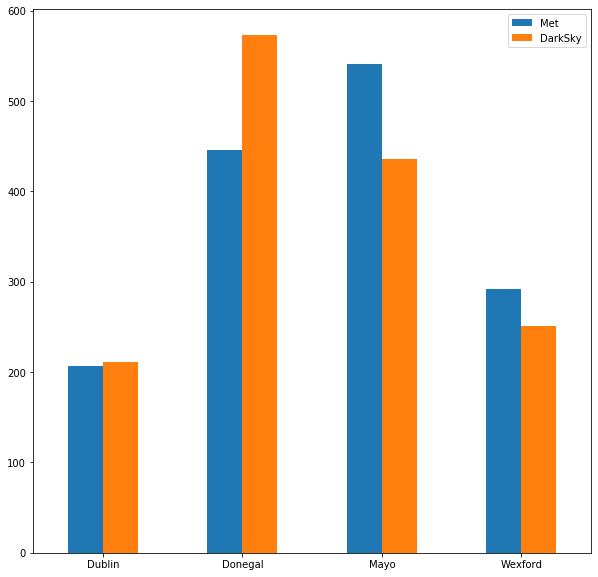

In [24]:
XML = [DublinXML,DonegalXML,MayoXML, WexfordXML]
JSON = [DublinJSON,DonegalJSON,MayoJSON, WexfordJSON]

index = ["Dublin", "Donegal", "Mayo", "Wexford"]

df2 = pd.DataFrame({'Met': XML, 'DarkSky': JSON}, index=index)
ax = df2.plot.bar(rot=0, figsize= (10,10))